# PCA vs. Autoencoder

In this tutorial we explore the relation between autoencoder (AE).

First, lets load up the iris dataset and scale it between [0,1]

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# get the labels name
labels = iris.target_names

# normalizing all values between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [3]:
print('X shape is:'+ str(X.shape))
print('labels are: ' + str(labels))

X shape is:(150, 4)
labels are: ['setosa' 'versicolor' 'virginica']


### PCA
Let's use PCA and map the data to 2D space.

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Let's plot the learned space with PCA

In [6]:
import matplotlib.pyplot as plt

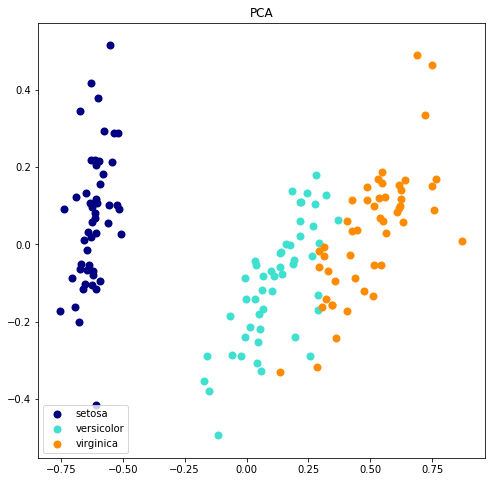

In [25]:
colors = ['navy', 'turquoise', 'darkorange']

for X_transformed in [X_pca]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title('PCA')

### Linear Autoencoder

Now let's impliment a linear AE. As we explained AE is a network that copys their inputs to their and outputs and the hidden layer size must be less than the input size. Linear AE has only one hidden layer and activation functions are linear.

![title](AE.png)

In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

/home/falcon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
# the size of our input
input_dim = X.shape[1]
# the size of our encoding representation
encoding_dim = 2

# the input placeholder
inputs = Input(shape=(input_dim,))

# encoding the input
encoded = Dense(encoding_dim, activation='linear')(inputs)

# decoding the latent space
decoded = Dense(input_dim, activation='linear')(encoded)

# maps the input to its representation
autoencoder = Model(inputs, decoded)

In [10]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


##### Note: Another cool things we can do we Keras is to plot the model, it will save it on your computer

In [11]:
from tensorflow.keras.utils import plot_model

In [12]:
plot_model(autoencoder,show_shapes=True,to_file='autoencoder.png')

We are almost ready to fit the model. we need to choose our optimizer and our loss function. For this implimentation we are going to use Adam optimizer and Mean Square Error as our loss function.

In [13]:
autoencoder.compile(optimizer='Adam', loss='mse')

Let's also create a seperate encoder model.

In [14]:
encoder = Model(inputs, encoded)

Let's also create a seperate decoder model.

In [15]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

Lets train the model

In [21]:
autoencoder.fit(X, X,
               epochs=50,
               batch_size=16,
               shuffle=True,
               validation_split=0.1)

Train on 135 samples, validate on 15 samples
Epoch 1/50
135/135 [==============================] - 0s 85us/step - loss: 0.1917 - val_loss: 0.3628
Epoch 2/50
135/135 [==============================] - 0s 78us/step - loss: 0.1841 - val_loss: 0.3523
Epoch 3/50
135/135 [==============================] - 0s 62us/step - loss: 0.1771 - val_loss: 0.3421
Epoch 4/50
135/135 [==============================] - 0s 62us/step - loss: 0.1704 - val_loss: 0.3325
Epoch 5/50
135/135 [==============================] - 0s 59us/step - loss: 0.1642 - val_loss: 0.3231
Epoch 6/50
135/135 [==============================] - 0s 71us/step - loss: 0.1583 - val_loss: 0.3140
Epoch 7/50
135/135 [==============================] - 0s 64us/step - loss: 0.1526 - val_loss: 0.3055
Epoch 8/50
135/135 [==============================] - 0s 68us/step - loss: 0.1472 - val_loss: 0.2973
Epoch 9/50
135/135 [==============================] - 0s 77us/step - loss: 0.1423 - val_loss: 0.2889
Epoch 10/50
135/135 [=========================

Now lets plot the latent space learned by our model.

In [22]:
code = encoder.predict(X)

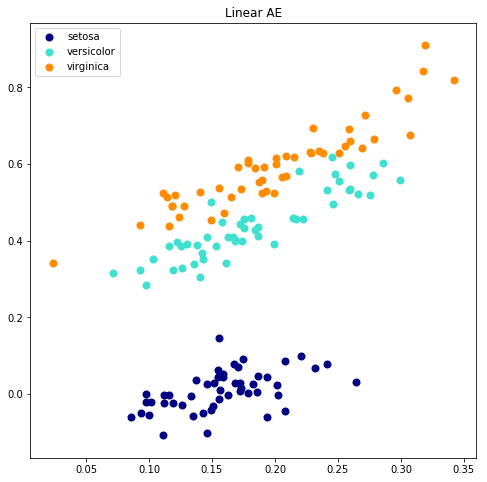

In [24]:
colors = ['navy', 'turquoise', 'darkorange']

for X_transformed in [code]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title('Linear AE')

# Deep Autoencoder

Now lets impliment a deep autoencoder with non-linear activation function. We are going to use MNIST dataset, MNIST is the hand written digits dataset which often use by deep learning community to compare their models.

In [26]:
from tensorflow.keras.datasets import mnist

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
print('Training dataset shape: ' + str(x_train.shape)) 
print('Testing dataset shape: ' + str(x_test.shape)) 

Training dataset shape: (60000, 28, 28)
Testing dataset shape: (10000, 28, 28)


In [29]:
# normalizing all values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

Let's plot one sample to see how data looks.

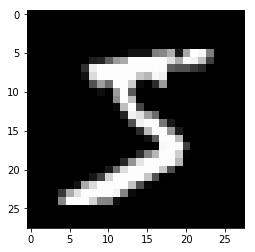

In [31]:
plt.imshow(x_train[0], cmap='gray')

In [32]:
# flatten the data
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print('Training dataset shape: ' + str(x_train.shape)) 
print('Testing dataset shape: ' + str(x_test.shape)) 

Training dataset shape: (60000, 784)
Testing dataset shape: (10000, 784)


Let's build our deep model.

![title](deepae.png)

In [131]:
# the size of our input
original_dim = x_train.shape[1]

# the input placeholder
input_img = Input(shape=(original_dim,), name='input_layer')

# lets impliment the encoder part first
# hidden layer
h = Dense(256, activation='relu', name='hidden_1')(input_img)

# hidden layer
h = Dense(128, activation='relu', name='hidden_2')(h)

# encoding the input
encoded = Dense(2, activation='relu', name='encoded')(h)

In [132]:
# lets impliment the decoder part

latent_inputs = Input(shape=(2,), name='latent_input')
h = Dense(128, activation='relu', name='hidden_3')(latent_inputs)
h = Dense(256, activation='relu', name='hidden_4')(h)
# output layer
outputs = Dense(original_dim, activation='sigmoid', name='output_layer')(h)

In [133]:
# instantiate encoder model
deepAE_encoder = Model(input_img, encoded, name='encoder')

In [134]:
# instantiate decoder model
deepAE_decoder = Model(latent_inputs, outputs, name='decoder')

In [135]:
deepAE_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               32896     
_________________________________________________________________
encoded (Dense)              (None, 2)                 258       
Total params: 234,114
Trainable params: 234,114
Non-trainable params: 0
_________________________________________________________________


In [136]:
deepAE_decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_input (InputLayer)    (None, 2)                 0         
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               384       
_________________________________________________________________
hidden_4 (Dense)             (None, 256)               33024     
_________________________________________________________________
output_layer (Dense)         (None, 784)               201488    
Total params: 234,896
Trainable params: 234,896
Non-trainable params: 0
_________________________________________________________________


In [137]:
# instantiate deep AE model
outputs = deepAE_decoder(deepAE_encoder(input_img))
deepAE = Model(input_img, outputs, name='deep_ae')

In [138]:
deepAE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
encoder (Model)              (None, 2)                 234114    
_________________________________________________________________
decoder (Model)              (None, 784)               234896    
Total params: 469,010
Trainable params: 469,010
Non-trainable params: 0
_________________________________________________________________


In [139]:
deepAE.compile(optimizer='adam', loss='mse')

In [144]:
deepAE.fit(x_train, x_train,
               epochs=50,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.0386 - val_loss: 0.0389
Epoch 2/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.0383 - val_loss: 0.0385
Epoch 3/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0381 - val_loss: 0.0384
Epoch 4/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0378 - val_loss: 0.0383
Epoch 5/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0376 - val_loss: 0.0381
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0374 - val_loss: 0.0378
Epoch 7/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0372 - val_loss: 0.0377
Epoch 8/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0371 - val_loss: 0.0376
Epoch 9/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.0369 - val_loss: 0.0375
Epoch

Now let's try to encode and decode the test dataset

In [150]:
encoded_imgs = deepAE_encoder.predict(x_test, batch_size=128)
decoded_imgs = deepAE_decoder.predict(encoded_imgs)

let's check how decoded samples look

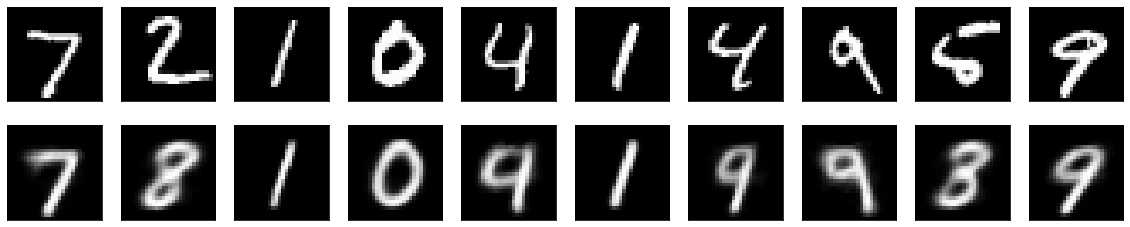

In [151]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    # display the original images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display the decoded images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Now lets look at the learned space. We can use t-sne to map the latent space to the 2D space and see how learned space looks.

In [152]:
# from sklearn.manifold import TSNE

In [153]:
# embeded_x = TSNE(n_components=2).fit_transform(encoded_imgs)

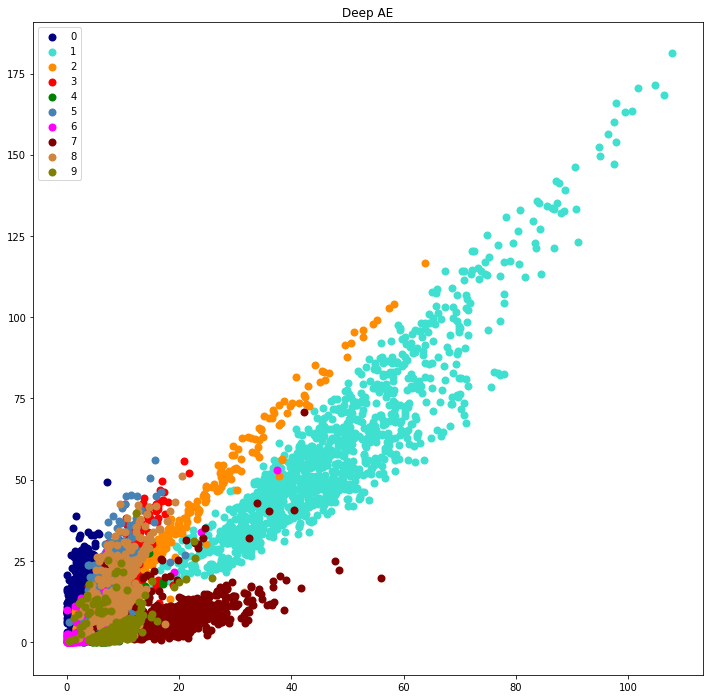

In [155]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'steelblue', 'magenta', 'maroon', 'peru', 'olive']

for X_transformed in [encoded_imgs]:
    plt.figure(figsize=(12, 12))
    for color, i, target_name in zip(colors, np.arange(0,10), np.arange(0,10)):
        plt.scatter(X_transformed[y_test == i, 0], X_transformed[y_test == i, 1],
                    color=color, lw=2, label=target_name)
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title('Deep AE')


# Varaitional Autoencoder

let's impliment a VAE with 512 hideen units in its hidden layer, and 128 units in its code.

![title](vae.png)

In [70]:
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import mse
import tensorflow.keras.backend as K


First, we are going to impliment representation trick

In [72]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [112]:
# network parameters
original_dim = x_train.shape[1]
intermediate_dim = 512
latent_dim = 2

In [113]:
# implimenting encoder model
inputs = Input(shape=(original_dim,), name='inputs')
h = Dense(intermediate_dim, activation='relu', name='hidden_layer')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(h)
z_log_var = Dense(latent_dim, name='z_log_var')(h)

In [114]:
# use reparameterization trick to push the sampling out as input
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

In [115]:
# implimenting decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
h = Dense(intermediate_dim, activation='relu', name='hidden_layer')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(h)

In [116]:
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

In [117]:
decoder = Model(latent_inputs, outputs, name='decoder')

In [118]:
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 784)          0                                            
__________________________________________________________________________________________________
hidden_layer (Dense)            (None, 512)          401920      inputs[0][0]                     
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        hidden_layer[0][0]               
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        hidden_layer[0][0]               
__________________________________________________________________________________________________
z (Lambda)

In [119]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      (None, 2)                 0         
_________________________________________________________________
hidden_layer (Dense)         (None, 512)               1536      
_________________________________________________________________
dense_14 (Dense)             (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________


In [120]:
#instantitate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [121]:
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 403972    
_________________________________________________________________
decoder (Model)              (None, 784)               403728    
Total params: 807,700
Trainable params: 807,700
Non-trainable params: 0
_________________________________________________________________


#### Implimentation of loss function
we need to impliment the loss function ourselfe. As we learn the loss function of VAE is:

loss = reconstruction_loss + KL_Divergense

For the reconstruction part we are going to use Mean Squered Loss function from Keras liberary.

And KL loss is calculated as follows:

\begin{equation*}
\mathrm{KL} [q_{\phi}(\mathbf{z} | \mathbf{x}) \| p(\mathbf{z}) ]
= - \frac{1}{2} \sum_{k=1}^K \{ 1 + \log \sigma_k^2 - \mu_k^2 - \sigma_k^2 \}
\end{equation*}

In [122]:
# reconstruction loss
reconstruction_loss = mse(inputs, outputs)
reconstruction_loss *= original_dim
# KL loss
kl_loss = 1+ z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *=  -0.5
# model loss
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [123]:
vae.compile(optimizer='adam')

In [124]:
vae.fit(x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 58.4614 - val_loss: 47.0731
Epoch 2/50
60000/60000 [==============================] - 5s 76us/step - loss: 45.2424 - val_loss: 43.8105
Epoch 3/50
60000/60000 [==============================] - 5s 76us/step - loss: 43.2805 - val_loss: 42.8504
Epoch 4/50
60000/60000 [==============================] - 5s 76us/step - loss: 42.4833 - val_loss: 42.1969
Epoch 5/50
60000/60000 [==============================] - 5s 76us/step - loss: 41.9793 - val_loss: 41.8864
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 41.5408 - val_loss: 41.4062
Epoch 7/50
60000/60000 [==============================] - 5s 77us/step - loss: 41.1573 - val_loss: 41.0174
Epoch 8/50
60000/60000 [==============================] - 5s 79us/step - loss: 40.8386 - val_loss: 40.7070
Epoch 9/50
60000/60000 [==============================] - 5s 88us/step - loss: 40.5718 - val_l

Because our latent space is two-dimensional, there are a few cool visualizations that can be done at this point. One is to look at the neighborhoods of different classes on the latent 2D plane: 

In [125]:
z_mean, _, _ = encoder.predict(x_test, batch_size=256)

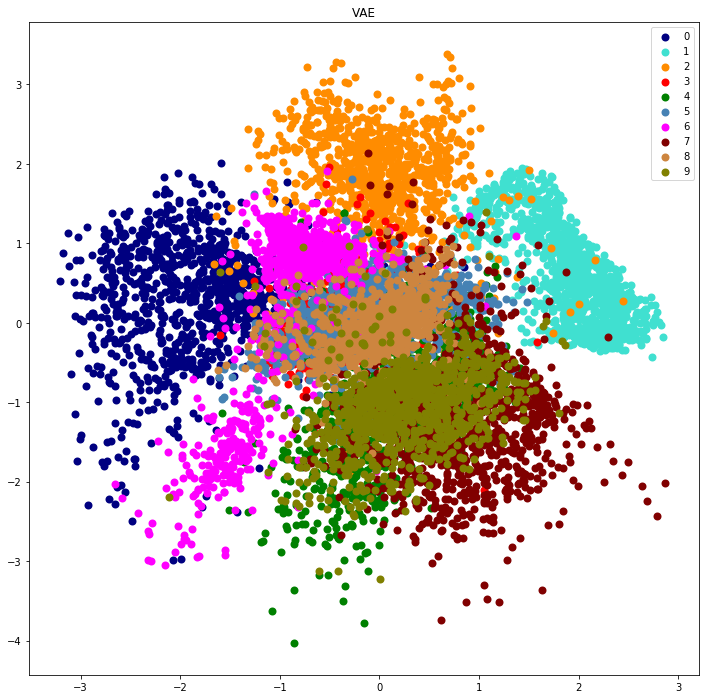

In [130]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'steelblue', 'magenta', 'maroon', 'peru', 'olive']

for X_transformed in [z_mean]:
    plt.figure(figsize=(12, 12))
    for color, i, target_name in zip(colors, np.arange(0,10), np.arange(0,10)):
        plt.scatter(X_transformed[y_test == i, 0], X_transformed[y_test == i, 1],
                    color=color, lw=2, label=target_name)
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title('VAE')

Because the VAE is a generative model, we can also use it to generate new digits! Here we will scan the latent plane, sampling latent points at regular intervals, and generating the corresponding digit for each of these points. This gives us a visualization of the latent manifold that "generates" the MNIST digits

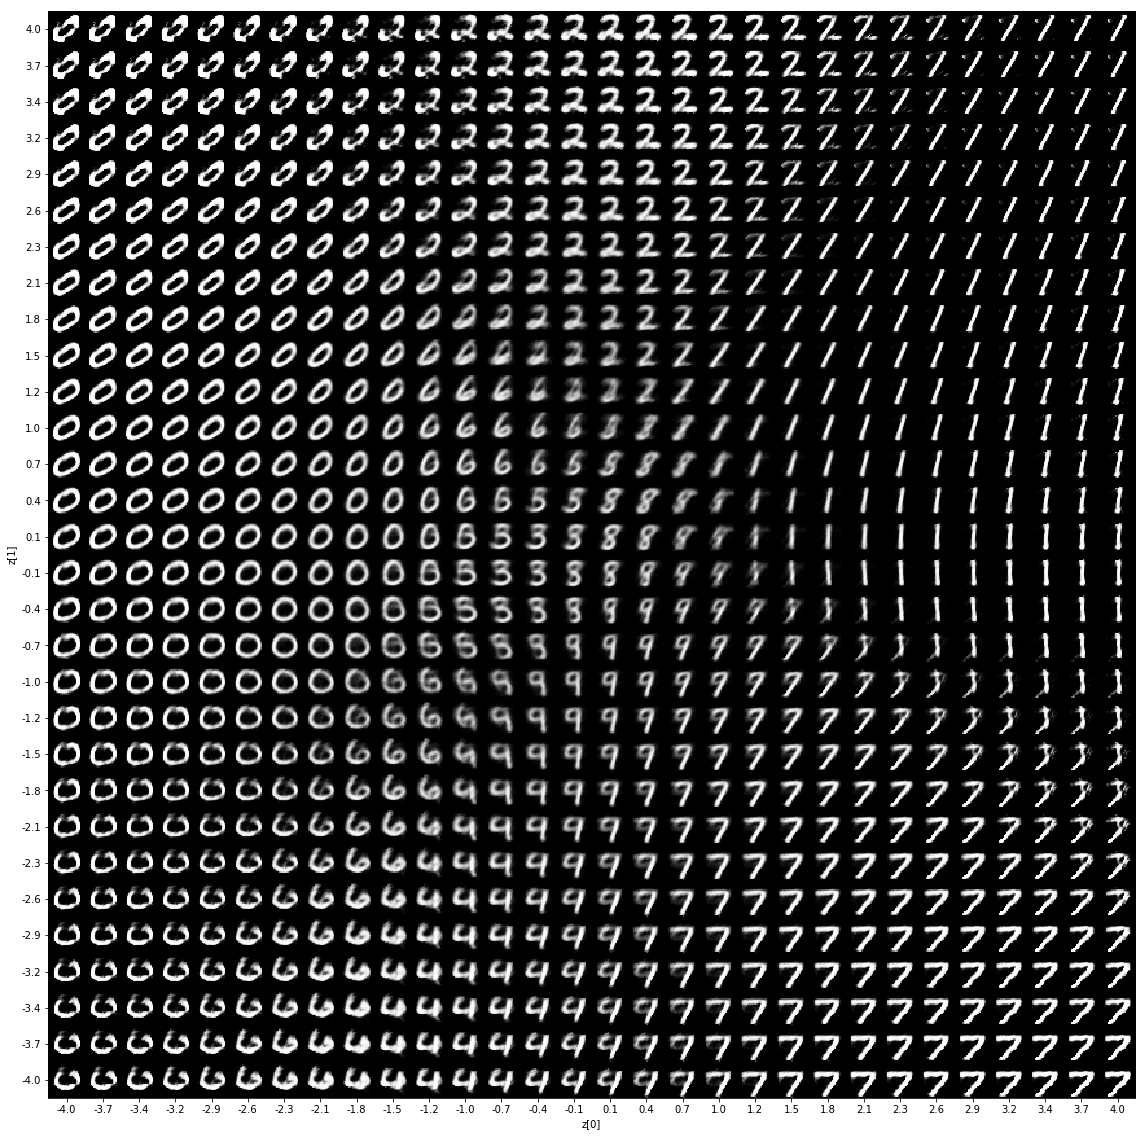

In [129]:
# display a 30x30 2D manifold of digits
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates corresponding to the 2D plot
# of digit classes in the latent space
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(20, 20))
start_range = digit_size // 2
end_range = (n - 1) * digit_size + start_range + 1
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap='Greys_r')
plt.show()